In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("C:\\Users\\DELL\\Desktop\\star_classification.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
data=data.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   u            100000 non-null  float64
 1   g            100000 non-null  float64
 2   r            100000 non-null  float64
 3   i            100000 non-null  float64
 4   z            100000 non-null  float64
 5   spec_obj_ID  100000 non-null  float64
 6   class        100000 non-null  object 
 7   redshift     100000 non-null  float64
 8   plate        100000 non-null  int64  
 9   MJD          100000 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 7.6+ MB


In [6]:
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()
data['class']=lbe.fit_transform(data['class'])
data['class']=data['class'].astype(int)
data['class'].unique()

array([0, 1, 2])

In [7]:
x=data.drop(['class'],axis=1)
y=data.loc[:,'class'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x=std.fit_transform(x)
type(x)

numpy.ndarray

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train

array([[-0.05822533, -0.06802891, -1.15802219, ..., -0.57587959,
        -1.33760963, -1.62493106],
       [-0.06664703, -0.05015812, -0.5673659 , ..., -0.78990921,
        -0.74586532, -0.51792112],
       [-0.06712863, -0.09227731, -1.58007898, ..., -0.78954216,
        -0.6235873 , -0.37581245],
       ...,
       [ 0.06221044,  0.02660565,  0.05700382, ..., -0.7888396 ,
        -0.63510379, -0.38963625],
       [-0.13183326, -0.1278337 , -2.04667006, ..., -0.78918564,
        -0.83257771, -0.67495949],
       [ 0.09288739,  0.01747404, -0.19418362, ..., -0.30673449,
        -0.39495111, -0.14744327]])

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)
score=rf.score(x_test,y_test)
rf_score=np.mean(score)
print('Accuracy : %.3f'% (rf_score))

Accuracy : 0.979


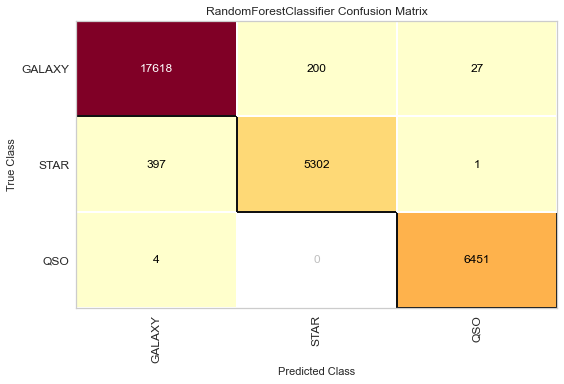

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [11]:
from yellowbrick.classifier import ConfusionMatrix
rf_cm=ConfusionMatrix(rf,classes=['GALAXY','STAR','QSO'])
rf_cm.fit(x_train,y_train)
rf_cm.score(x_test,y_test)
rf_cm.show()

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     17845
           1       0.96      0.93      0.95      5700
           2       1.00      1.00      1.00      6455

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.98     30000
weighted avg       0.98      0.98      0.98     30000



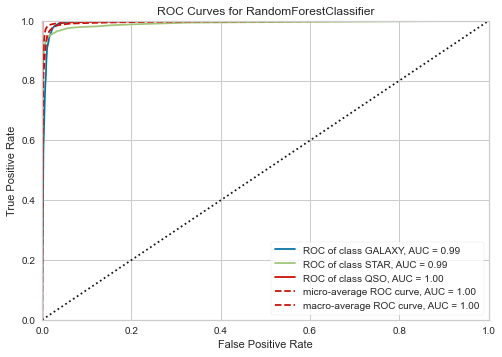

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [13]:
from yellowbrick import ROCAUC
visualizer = ROCAUC(rf, classes=["GALAXY", "STAR", "QSO"])

visualizer.fit(x_train, y_train)       
visualizer.score(x_test, y_test)        
visualizer.show()

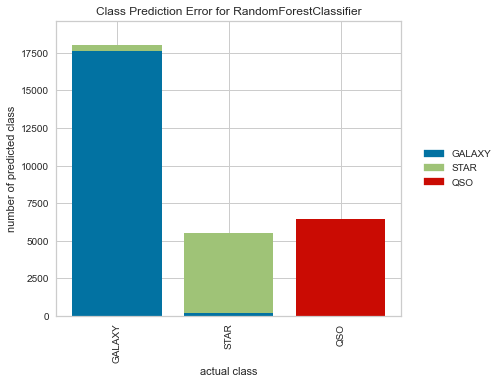

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [14]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rf, classes=["GALAXY", "STAR", "QSO"])

visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)        
visualizer.show()